# Assumptions

1. There are some rows in the data where the user is Paid but the Revenue is 0 and also the Count of Cash Games is 0, removed such rows
2. There are some rows in the data where the user is Paid with 0 Cash Game count but Revenue is non zero, removed these rows

The final dataset now has 2,947 Control group users and 2,939 Test Group users

Added some columns to the original dataset indicating Paid/Unpaid,Cash Games or not,Fun Games or not by 0s and 1s


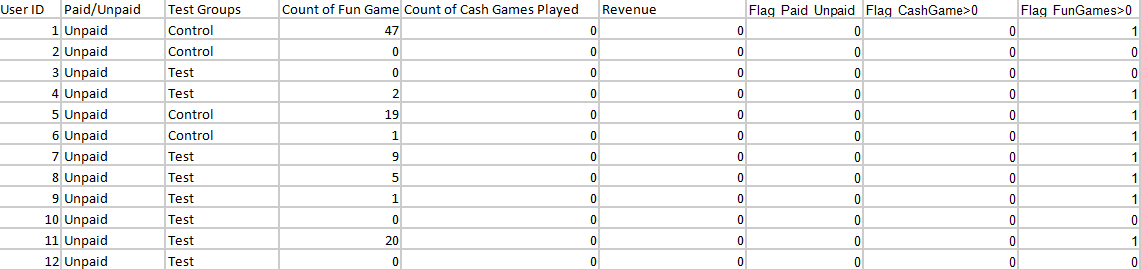

LTP =Count of Paid Users/Count of Total Users (in a group)
Conversion Rate =Count of Users with>0 Cash Game count/Count of Total Users (in a group)

# Visualizations

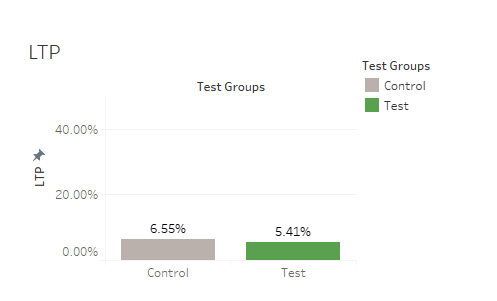

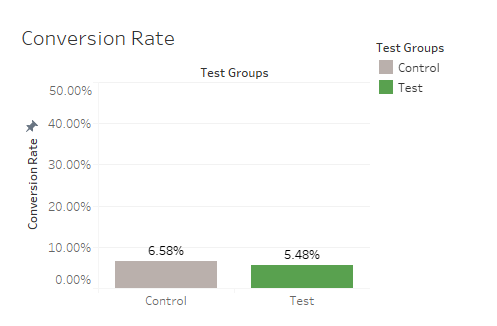

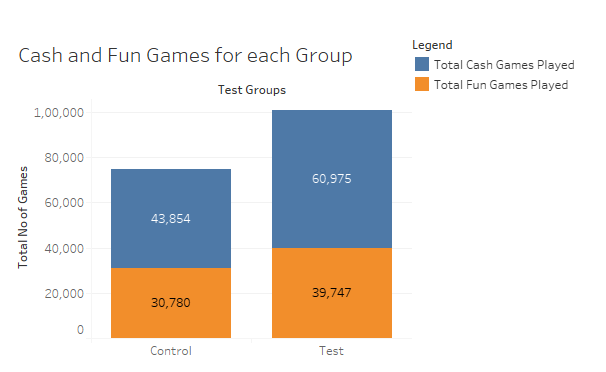

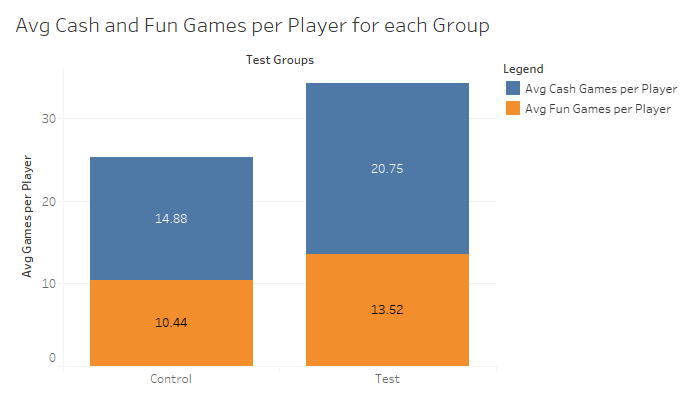

# Statistical Tests for Test and Control Groups (using R)

We will perform two proportions Z-Test for Conversion Rate and LTP, two sample t-test for Cash Games and Fun Games count.

Null Hypothesis in each case would be that there is no difference between the two group results
Alternate Hypothesis would be that there is a difference in the results on two groups and one is better than the other.

p -value taken = 0.05

In [2]:
#fetch data

getwd()
setwd("C:/Users/oyo/Downloads")

data<-read.csv("testdata.csv",stringsAsFactors = FALSE)

# split data into test and control samples for statistical tests

test<-data[data$Test.Groups=='Test',]
control<-data[data$Test.Groups=='Control',]

head(test)

head(control)


[1] "C:/Users/oyo/Downloads"

,User.ID,Paid.Unpaid,Test.Groups,Count.of.Fun.Games.Played,Count.of.Cash.Games.Played,Revenue,Flag_Paid_Unpaid,Flag_CashGame.0,Flag_FunGames.0
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>
3,3,Unpaid,Test,0,0,0,0,0,0
4,4,Unpaid,Test,2,0,0,0,0,1
7,7,Unpaid,Test,9,0,0,0,0,1
8,8,Unpaid,Test,5,0,0,0,0,1
9,9,Unpaid,Test,1,0,0,0,0,1
10,10,Unpaid,Test,0,0,0,0,0,0


,User.ID,Paid.Unpaid,Test.Groups,Count.of.Fun.Games.Played,Count.of.Cash.Games.Played,Revenue,Flag_Paid_Unpaid,Flag_CashGame.0,Flag_FunGames.0
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,1,Unpaid,Control,47,0,0,0,0,1
2,2,Unpaid,Control,0,0,0,0,0,0
5,5,Unpaid,Control,19,0,0,0,0,1
6,6,Unpaid,Control,1,0,0,0,0,1
13,13,Unpaid,Control,12,0,0,0,0,1
14,14,Unpaid,Control,5,0,0,0,0,1


In [3]:
#Two-proportions z-test in R

## 1. conversion rate

tn<-length(test$Flag_CashGame)

tc<-length(test$Flag_CashGame.0[test$Flag_CashGame.0==1])

cn<-length(control$Flag_CashGame)

cc<-length(control$Flag_CashGame.0[control$Flag_CashGame.0==1])

prop.test(x = c(tc,cc), n = c(tn, cn),
          alternative = "less")





	2-sample test for equality of proportions with continuity correction

data:  c(tc, cc) out of c(tn, cn)
X-squared = 2.9778, df = 1, p-value = 0.04221
alternative hypothesis: less
95 percent confidence interval:
 -1.0000000000 -0.0005052071
sample estimates:
    prop 1     prop 2 
0.05478054 0.06582966 


The p- value is less than 0.05, so we can reject the null hypothesis and say that the difference in Conversion rate in test and control groups is significant, hence the hypothesis that conversion rate is higher in Control group than the Test Group is statistically significant. For conversion rate, Test Group performance is not good.

In [4]:
#Two-proportions z-test in R

#2. LTP


tn2<-length(test$Flag_Paid_Unpaid)

tc2<-length(test$Flag_Paid_Unpaid[test$Flag_Paid_Unpaid==1])

cn2<-length(control$Flag_Paid_Unpaid)

cc2<-length(control$Flag_Paid_Unpaid[control$Flag_Paid_Unpaid==1])

prop.test(x = c(tc2,cc2), n = c(tn2, cn2),
          alternative = "less")





	2-sample test for equality of proportions with continuity correction

data:  c(tc2, cc2) out of c(tn2, cn2)
X-squared = 3.1958, df = 1, p-value = 0.03691
alternative hypothesis: less
95 percent confidence interval:
 -1.0000000000 -0.0008870775
sample estimates:
    prop 1     prop 2 
0.05410003 0.06549033 


The p- value is less than 0.05, so we can reject the null hypothesis and say that the difference in LTP in test and control groups is significant, hence the hypothesis that LTP is higher in Control group than the Test Group is statistically significant. For LTP, Test Group performance is not good.

In [5]:
#Two Sample t -test

## 3. Cash Games

x<-test$Count.of.Cash.Games.Played
y<-control$Count.of.Cash.Games.Played

t.test(x,y)





	Welch Two Sample t-test

data:  x and y
t = 1.9099, df = 5377.4, p-value = 0.0562
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1552454 11.8871591
sample estimates:
mean of x mean of y 
 20.74685  14.88090 


The p- value is greater than 0.05, so we cannot reject the null hypothesis hence the hypothesis that More number of Cash Games are played per player in test group than that in Control group is not true.

In [6]:
#Two Sample t -test

##4. Fun Games

x2<-test$Count.of.Fun.Games.Played
y2<-control$Count.of.Fun.Games.Played

t.test(x2,y2)


	Welch Two Sample t-test

data:  x2 and y2
t = 1.2794, df = 3714.4, p-value = 0.2008
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.639729  7.798665
sample estimates:
mean of x mean of y 
 13.52399  10.44452 


The p- value is greater than 0.05, so we cannot reject the null hypothesis hence the hypothesis that More number of Fun Games are played per player in test group than that in Control group is not true.

# Conclusion

Based on the above statistical tets, it can be concluded that:

1. Conversion Rate - Control Group performed better than the Test Group
2. LTP - Control Group performed better than the Test Group
3. Cash Games - We can not say there is a significant staistical difference between the two groups
4. Fun Games - We can not say there is a significant staistical difference between the two groups

From these results, it would be safe to say that it is better not to implement the new feature.